In [1]:
import myutils as my
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.decomposition import PCA
%matplotlib inline
%load_ext rpy2.ipython

In [2]:
df = pd.DataFrame(pd.read_csv("./data/minimal.50d.3f.csv")).set_index("0")

In [3]:
pca = PCA(n_components = 2)

In [23]:
nums = ["1", "2", "3", "4", "5", "6", "7",  "one", "two", "three", "four", "five", "six", "seven"]


In [24]:
pca.fit(df.loc[nums])

PCA(copy=True, n_components=2, whiten=False)

In [25]:
nums_plot = pd.DataFrame(pca.transform(df.loc[nums])).rename(columns={0:"x", 1:"y"})
nums_plot["name"] = nums
nums_plot


,x,y,name
0,-2.441206,-0.789029,1
1,-2.171339,-0.361372,2
2,-2.090134,0.052437,3
3,-1.973849,0.238422,4
4,-1.729182,0.223356,5
5,-1.841273,0.442475,6
6,-1.788175,0.463689,7
7,1.758569,-2.287331,one
8,2.339540,-0.104127,two
9,2.105279,0.198543,three


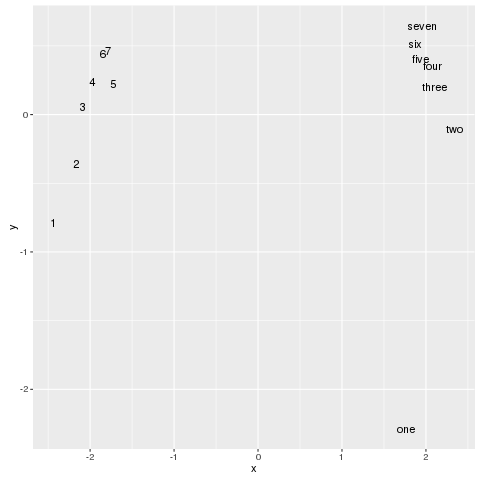

In [26]:
%%R -i nums_plot
library(ggplot2)

ggplot(nums_plot, aes(x, y, label=name)) +
  geom_text()

In [44]:
adjs = ["clear", "clearer", "clearest",
        "dark", "darker", "darkest",
        "strong", "stronger", "strongest"]
pca =PCA(n_components = 2)
pca.fit(df.loc[adjs])
adjs_plot = pd.DataFrame(pca.transform(df.loc[adjs])).rename(columns={0:"x", 1:"y"})
adjs_plot["name"] = adjs

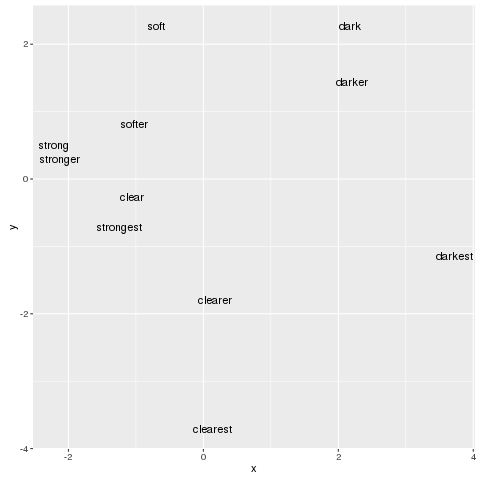

In [42]:
%%R -i adjs_plot

ggplot(adjs_plot, aes(x, y, label=name)) +
  geom_text()

In [45]:
def get_PCA_plot(words):
    pca =PCA(n_components = 2)
    pca.fit(df.loc[words])
    plot = pd.DataFrame(pca.transform(df.loc[words])).rename(columns={0:"x", 1:"y"})
    plot["name"] = words
    return plot

In [51]:
man_woman = get_PCA_plot(["man", "woman",
                          "uncle", "aunt",
                          "niece", "nephew",
                          "king", "queen",
                         "brother", "sister",
                         "heir", "heiress", 
                         "actor", "actress",
                         "waiter", "waitress"])

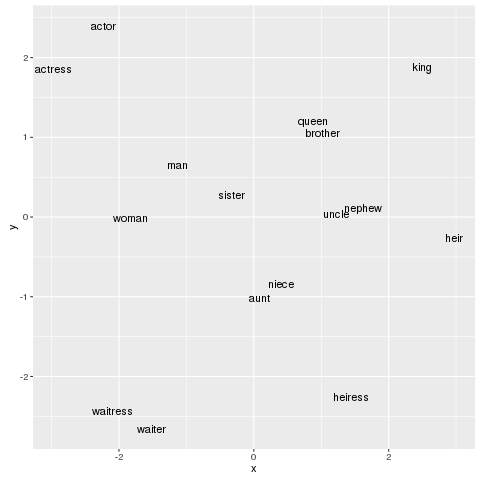

In [52]:
%%R -i man_woman

ggplot(man_woman, aes(x, y, label=name)) +
  geom_text()